**Data Pre-processing for Cats and Dogs Dataset from Kaggle**

In [1]:
# Install the split-folders to split the dataset into train, validation and test
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessay libraries
import os
import zipfile
import cv2
import splitfolders
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image

In [3]:
# Download dataset from Google Drive
! gdown --id 1yAx9epfEO0SebwQ4MMZhnh1xRkalXhws

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yAx9epfEO0SebwQ4MMZhnh1xRkalXhws
To: /content/kagglecatsanddogs_5340.zip
100% 825M/825M [00:03<00:00, 270MB/s]


In [4]:
# Open the zip file and create a new folder as Dataset
zip_file_local = '/content/kagglecatsanddogs_5340.zip'
zip_file_reference = zipfile.ZipFile(zip_file_local, 'r')
zip_file_reference.extractall('/content/Dataset')
zip_file_reference.close()

In [5]:
input_folder = "/content/Dataset/PetImages"
# Split dataset into train, validation and test dataset with a ratio of 0.7/0.2/0.1
splitfolders.ratio(input_folder, output="/content/Dataset/splitted_dataset",
                   seed=42, ratio=(0.7, 0.2, 0.1),
                   group_prefix=None)

Copying files: 25002 files [00:04, 5718.31 files/s]


In [6]:
# Number of Elements in the Training Datasets
print("Training Cat image count: ",len(os.listdir("/content/Dataset/splitted_dataset/train/Cat")))
print("Training Dog image count: ",len(os.listdir("/content/Dataset/splitted_dataset/train/Dog")))

Training Cat image count:  8750
Training Dog image count:  8750


In [7]:
# Number of Elements in the Validation Datasets
print("Validation Cat image count: ",len(os.listdir("/content/Dataset/splitted_dataset/val/Cat")))
print("Validation Dog image count: ",len(os.listdir("/content/Dataset/splitted_dataset/val/Dog")))

Validation Cat image count:  2500
Validation Dog image count:  2500


In [8]:
# Number of Elements in the Test Datasets
print("Test Cat image count: ",len(os.listdir("/content/Dataset/splitted_dataset/test/Cat")))
print("Test Dog image count: ",len(os.listdir("/content/Dataset/splitted_dataset/test/Dog")))

Test Cat image count:  1251
Test Dog image count:  1251


In [9]:
# Resize dataset to 224x224
train_dataset = "/content/Dataset/splitted_dataset/train"
test_dataset = "/content/Dataset/splitted_dataset/test"

train_images = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(train_dataset,
                        target_size=(224,224),
                        batch_size=10)
test_images = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(test_dataset,
                        target_size=(224,224),
                        batch_size=30)

Found 17498 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


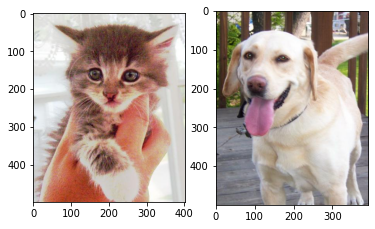

In [10]:
# Example Cat and Dog Images from the Training Dataset
Cat_image = mpimg.imread("/content/Dataset/splitted_dataset/train/Cat/100.jpg")
Dog_image = mpimg.imread("/content/Dataset/splitted_dataset/train/Dog/11425.jpg")

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(Cat_image)
ax2.imshow(Dog_image)

plt.show()